In [59]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Loading Train and Test data 

In [15]:
# Helper function
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [16]:
# loading train_transaction data
train_transaction = pd.read_csv('train_transaction.csv')
print(train_transaction.shape)
train_transaction = reduce_mem_usage(train_transaction)
train_transaction.head()

(590540, 394)
Memory usage of dataframe is 1775.15 MB
Memory usage after optimization is: 487.16 MB
Decreased by 72.6%


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Loading train_identity data
train_identity = pd.read_csv('train_identity.csv')
print(train_identity.shape)
train_identity = reduce_mem_usage(train_identity)
train_identity.head()

(144233, 41)
Memory usage of dataframe is 45.12 MB
Memory usage after optimization is: 10.00 MB
Decreased by 77.8%


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [18]:
train_df_org = pd.merge(train_transaction, train_identity, how='left')
print(train_df_org.shape)
len_train_df = len(train_df_org)
del train_transaction, train_identity
train_df_org.head()

(590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [19]:
# Loading test data
test_transaction = pd.read_csv('test_transaction.csv')
print(test_transaction.shape)
test_transaction = reduce_mem_usage(test_transaction)

test_identity = pd.read_csv('train_identity.csv')
print(test_identity.shape)
test_identity = reduce_mem_usage(test_identity)

test_df_org = pd.merge(test_transaction, test_identity, how='left')
test_df_org.columns = train_df_org.drop('isFraud', axis=1).columns
print(test_df_org.shape)
del test_transaction, test_identity
test_df_org.head()

(506691, 393)
Memory usage of dataframe is 1519.24 MB
Memory usage after optimization is: 425.24 MB
Decreased by 72.0%
(144233, 41)
Memory usage of dataframe is 45.12 MB
Memory usage after optimization is: 10.00 MB
Decreased by 77.8%
(506691, 433)


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.953125,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,285.000000,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.937500,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Creating Train, Dev and Test set

In [20]:
y = train_df_org['isFraud']
train_df = train_df_org.drop(columns=['isFraud', 'TransactionID'])
test_df = test_df_org.drop(columns=['TransactionID'])

train_df, valid_df, y_train, y_valid = train_test_split(train_df, y, train_size=0.8, test_size=0.2, random_state=0)
print(train_df.shape)
print(test_df.shape)
print(valid_df.shape)

(472432, 432)
(506691, 432)
(118108, 432)


# Dropping Columns with more than 20% missingness

In [21]:
# Dropping columns with more than 20% missing values 
mv = train_df.isnull().sum()/len(train_df)
train_mv_df = train_df.drop(columns=mv[mv>0.2].index)
valid_mv_df = valid_df.drop(columns=mv[mv>0.2].index)
test_mv_df = test_df.drop(columns=mv[mv>0.2].index)

del train_df, test_df, valid_df
print(train_mv_df.shape)
print(test_mv_df.shape)

(472432, 180)
(506691, 180)


# Feature Engineering

In [22]:
#removing the outlier in TransactionAmt column
bool_ind = train_mv_df['TransactionAmt']<30000
train_mv_df = train_mv_df[bool_ind]
y_train = y_train[bool_ind]
print(train_mv_df.shape)
print(y_train.shape)

(472430, 180)
(472430,)


In [23]:
#extracting day, dayofweek and hour from TransactionDT column
train_mv_df['day'] = train_mv_df['TransactionDT'] / (24*60*60)
train_mv_df['dayofweek'] = (train_mv_df['TransactionDT']//(60*60*24)-1)%7
train_mv_df['hour'] = (train_mv_df['TransactionDT']//(60*60))%24
train_mv_df.drop(columns=['TransactionDT'] , inplace = True)
print(train_mv_df.shape)

test_mv_df['day'] = test_mv_df['TransactionDT'] / (24*60*60)
test_mv_df['dayofweek'] = (test_mv_df['TransactionDT']//(60*60*24)-1)%7
test_mv_df['hour'] = (test_mv_df['TransactionDT']//(60*60))%24
test_mv_df.drop(columns=['TransactionDT'] , inplace = True)
print(test_mv_df.shape)

valid_mv_df['day'] = valid_mv_df['TransactionDT'] / (24*60*60)
valid_mv_df['dayofweek'] = (valid_mv_df['TransactionDT']//(60*60*24)-1)%7
valid_mv_df['hour'] = (valid_mv_df['TransactionDT']//(60*60))%24
valid_mv_df.drop(columns=['TransactionDT'] , inplace = True)
print(valid_mv_df.shape)

(472430, 182)
(506691, 182)
(118108, 182)


### Missing Values Imputation

In [24]:
# Filtering numerical data
train_num_mv_df = train_mv_df.select_dtypes(include=np.number)
print(train_num_mv_df.shape)
valid_num_mv_df = valid_mv_df.select_dtypes(include=np.number)
print(valid_num_mv_df.shape)
test_num_mv_df = test_mv_df.select_dtypes(include=np.number)
print(test_num_mv_df.shape)

# Filtering categorical data
train_cat_mv_df = train_mv_df.select_dtypes(exclude=np.number)
print(train_cat_mv_df.shape)
valid_cat_mv_df = valid_mv_df.select_dtypes(exclude=np.number)
print(valid_cat_mv_df.shape)
test_cat_mv_df = test_mv_df.select_dtypes(exclude=np.number)
print(test_cat_mv_df.shape)
del train_mv_df, test_mv_df

# Filling missing values by median for numerical columns 
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
train_num_df = pd.DataFrame(imp_median.fit_transform(train_num_mv_df), columns=train_num_mv_df.columns)
valid_num_df = pd.DataFrame(imp_median.transform(valid_num_mv_df), columns=valid_num_mv_df.columns)
test_num_df = pd.DataFrame(imp_median.transform(test_num_mv_df), columns=test_num_mv_df.columns)
del train_num_mv_df, test_num_mv_df
print(train_num_df.shape)
print(test_num_df.shape)


# Filling missing values by most frequent value for categorical columns
imp_max = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train_cat_df = pd.DataFrame(imp_max.fit_transform(train_cat_mv_df), columns=train_cat_mv_df.columns)
valid_cat_df = pd.DataFrame(imp_max.transform(valid_cat_mv_df), columns=valid_cat_mv_df.columns)
test_cat_df = pd.DataFrame(imp_max.transform(test_cat_mv_df), columns=test_cat_mv_df.columns)
del train_cat_mv_df, test_cat_mv_df
print(train_cat_df.shape)
print(test_cat_df.shape)

# Concatinating numerical and categorical data
train_df_cleaned = pd.concat([train_num_df, train_cat_df], axis=1)
valid_df_cleaned = pd.concat([valid_num_df, valid_cat_df], axis=1)
test_df_cleaned = pd.concat([test_num_df, test_cat_df], axis=1)
del train_num_df, train_cat_df, test_num_df, test_cat_df,

# Verifying missing values - train set
print(f'Total missing values: {train_df_cleaned.isnull().sum().sum()}')
print(train_df_cleaned.shape)
train_df_cleaned.head()

(472430, 178)
(118108, 178)
(506691, 178)
(472430, 4)
(118108, 4)
(506691, 4)
(472430, 178)
(506691, 178)
(472430, 4)
(506691, 4)
Total missing values: 0
(472430, 182)


,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,...,V319,V320,V321,day,dayofweek,hour,ProductCD,card4,card6,P_emaildomain
0,441.0000,13809.0,583.0,150.0,226.0,204.0,87.0,2.0,2.0,0.0,...,440.950012,440.950012,440.950012,58.680058,1.0,16.0,W,visa,credit,yahoo.com
1,460.0000,12695.0,490.0,150.0,226.0,325.0,87.0,2.0,2.0,0.0,...,0.000000,0.000000,0.000000,170.990324,1.0,23.0,W,visa,debit,hotmail.com
2,49.0000,12695.0,490.0,150.0,226.0,325.0,87.0,2.0,3.0,0.0,...,0.000000,0.000000,0.000000,106.565706,0.0,13.0,W,visa,debit,frontier.com
3,35.9375,18132.0,567.0,150.0,117.0,204.0,87.0,137.0,122.0,0.0,...,0.000000,0.000000,0.000000,44.845810,1.0,20.0,W,mastercard,debit,gmail.com
4,113.0000,17399.0,111.0,150.0,224.0,204.0,87.0,1.0,1.0,0.0,...,0.000000,0.000000,0.000000,72.054595,1.0,1.0,W,mastercard,debit,gmail.com


In [25]:
# Verifying missing values - valid set
print(f'Total missing values: {valid_df_cleaned.isnull().sum().sum()}')
print(valid_df_cleaned.shape)
valid_df_cleaned.head()

Total missing values: 0
(118108, 182)


,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,...,V319,V320,V321,day,dayofweek,hour,ProductCD,card4,card6,P_emaildomain
0,25.000000,9803.0,583.0,150.0,226.0,269.0,87.0,1.0,1.0,0.0,...,0.0,0.0,0.0,2.810579,1.0,19.0,H,visa,credit,yahoo.com
1,117.000000,7919.0,194.0,150.0,166.0,181.0,87.0,1.0,4.0,0.0,...,0.0,0.0,0.0,175.034722,6.0,0.0,W,mastercard,debit,gmail.com
2,73.750000,12778.0,500.0,185.0,224.0,284.0,60.0,1.0,3.0,0.0,...,0.0,0.0,0.0,96.974248,4.0,23.0,C,mastercard,credit,hotmail.com
3,400.000000,12316.0,548.0,150.0,195.0,441.0,87.0,1.0,1.0,0.0,...,0.0,0.0,0.0,30.183333,1.0,4.0,R,visa,credit,anonymous.com
4,31.953125,9002.0,453.0,150.0,226.0,264.0,87.0,3.0,3.0,0.0,...,0.0,0.0,0.0,141.510926,0.0,12.0,W,visa,debit,yahoo.com


In [26]:
# Verifying missing values - test set
print(f'Total missing values: {test_df_cleaned.isnull().sum().sum()}')
print(test_df_cleaned.shape)
test_df_cleaned.head()

Total missing values: 0
(506691, 182)


,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,...,V319,V320,V321,day,dayofweek,hour,ProductCD,card4,card6,P_emaildomain
0,31.953125,10409.0,111.0,150.0,226.0,170.0,87.0,6.0,6.0,0.0,...,0.0,0.0,0.0,213.000278,2.0,0.0,W,visa,debit,gmail.com
1,49.000000,4272.0,111.0,150.0,226.0,299.0,87.0,3.0,2.0,0.0,...,0.0,0.0,0.0,213.000729,2.0,0.0,W,visa,debit,aol.com
2,171.000000,4476.0,574.0,150.0,226.0,472.0,87.0,2.0,2.0,0.0,...,0.0,263.0,0.0,213.001273,2.0,0.0,W,visa,debit,hotmail.com
3,285.000000,10989.0,360.0,150.0,166.0,205.0,87.0,5.0,2.0,0.0,...,0.0,0.0,0.0,213.001273,2.0,0.0,W,visa,debit,gmail.com
4,67.937500,18018.0,452.0,150.0,117.0,264.0,87.0,6.0,6.0,0.0,...,0.0,0.0,0.0,213.001354,2.0,0.0,W,mastercard,debit,gmail.com


### PCA on C1-C14

In [27]:
#applying PCA on C1-C14
st = train_df_cleaned.columns.get_loc('C1')
end = train_df_cleaned.columns.get_loc('C14')

cdf = train_df_cleaned.iloc[:, st:end+1]
rcols = cdf.columns
cdf.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,2.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0
1,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,40.0,2.0
2,2.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,1.0,0.0,8.0,2.0
3,137.0,122.0,0.0,0.0,208.0,92.0,0.0,0.0,93.0,0.0,94.0,0.0,601.0,102.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [28]:
cscalar = StandardScaler()
df_scaled = pd.DataFrame(cscalar.fit_transform(cdf), columns=cdf.columns)
df_scaled

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,-0.090320,-0.085565,-0.037101,-0.059493,-0.177417,-0.098725,-0.046146,-0.053971,-0.148891,-0.054842,-0.097732,-0.047022,-0.243386,-0.146905
1,-0.090320,-0.085565,-0.037101,-0.059493,-0.216176,-0.112615,-0.046146,-0.053971,-0.148891,-0.054842,-0.087212,-0.047022,0.057049,-0.126843
2,-0.090320,-0.079156,-0.037101,-0.059493,-0.216176,-0.098725,-0.046146,-0.053971,-0.088946,-0.054842,-0.097732,-0.047022,-0.189462,-0.126843
3,0.912164,0.683534,-0.037101,-0.059493,7.845557,1.151323,-0.046146,-0.053971,5.306066,-0.054842,0.880703,-0.047022,4.378689,1.879440
4,-0.097746,-0.091974,-0.037101,-0.059493,-0.216176,-0.112615,-0.046146,-0.053971,-0.208836,-0.054842,-0.097732,-0.047022,-0.243386,-0.146905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472425,-0.097746,-0.091974,-0.037101,-0.059493,-0.216176,-0.112615,-0.046146,-0.053971,-0.208836,-0.054842,-0.097732,-0.047022,-0.243386,-0.146905
472426,-0.068042,-0.072747,-0.037101,-0.059493,-0.099901,-0.098725,-0.046146,-0.053971,-0.148891,-0.054842,-0.076691,-0.047022,-0.081613,-0.086717
472427,-0.097746,-0.085565,-0.037101,-0.045076,-0.216176,-0.112615,-0.030074,-0.043565,-0.268780,-0.044452,-0.097732,-0.035577,-0.243386,-0.146905
472428,-0.090320,-0.085565,-0.037101,-0.059493,-0.216176,-0.112615,-0.046146,-0.053971,-0.208836,-0.054842,-0.097732,-0.047022,-0.227979,-0.126843


In [29]:
cpca = PCA()
c_df_pca = pd.DataFrame(cpca.fit_transform(df_scaled), columns = ['pc_c' + str(i) for i in range(df_scaled.shape[1])])
c_df_pca

,pc_c0,pc_c1,pc_c2,pc_c3,pc_c4,pc_c5,pc_c6,pc_c7,pc_c8,pc_c9,pc_c10,pc_c11,pc_c12,pc_c13
0,-0.319409,-0.273708,-0.040086,-0.008089,0.034710,0.060222,-0.022936,0.009103,0.011797,0.011022,-0.004297,-0.008414,0.002237,-0.003405
1,-0.241263,-0.183823,-0.039095,-0.026760,0.000899,-0.195583,0.077397,-0.019492,0.008518,0.003338,-0.011421,0.005150,-0.007325,0.005200
2,-0.296514,-0.238161,-0.039815,-0.003830,0.092698,0.006645,-0.008977,0.007790,0.001885,0.012300,-0.013769,-0.009894,0.006400,-0.004879
3,3.506601,9.962840,0.061569,-0.899090,-1.686687,0.713551,-0.136820,0.121800,0.119027,0.221678,-0.081901,-0.025729,-0.054710,0.007944
4,-0.333997,-0.334214,-0.040621,-0.001842,0.014455,0.034650,-0.016201,0.000899,0.001874,0.000949,-0.001144,-0.000381,-0.000909,-0.000169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472425,-0.333997,-0.334214,-0.040621,-0.001842,0.014455,0.034650,-0.016201,0.000899,0.001874,0.000949,-0.001144,-0.000381,-0.000909,-0.000169
472426,-0.238573,-0.158721,-0.038788,-0.009488,-0.040485,-0.028233,0.017271,-0.014842,-0.015631,-0.009474,0.004883,0.002921,-0.004206,0.003658
472427,-0.316832,-0.379572,-0.040948,-0.007816,-0.029711,0.030505,-0.016412,-0.000191,-0.000143,-0.007760,-0.003012,-0.002223,0.000536,0.001312
472428,-0.319798,-0.325971,-0.040518,0.005174,0.012775,0.024674,-0.010931,-0.004080,-0.011745,-0.006618,0.002037,-0.001759,0.001831,-0.000569


In [30]:
sum(cpca.explained_variance_ratio_[:4])

0.9909744080246624

In [31]:
csel_df_pca = c_df_pca.iloc[:, 0:4]
print(csel_df_pca.shape)
csel_df_pca.head()

(472430, 4)


,pc_c0,pc_c1,pc_c2,pc_c3
0,-0.319409,-0.273708,-0.040086,-0.008089
1,-0.241263,-0.183823,-0.039095,-0.026760
2,-0.296514,-0.238161,-0.039815,-0.003830
3,3.506601,9.962840,0.061569,-0.899090
4,-0.333997,-0.334214,-0.040621,-0.001842


In [32]:
#transforming test and valid set according to our selected PC's
st = test_df_cleaned.columns.get_loc('C1')
end = test_df_cleaned.columns.get_loc('C14')
cdf_t = test_df_cleaned.iloc[:, st:end+1]
df_scaled_t = pd.DataFrame(cscalar.transform(cdf_t), columns=cdf_t.columns)
c_df_pca_t = pd.DataFrame(cpca.transform(df_scaled_t), columns = ['pc_c' + str(i) for i in range(df_scaled_t.shape[1])])
csel_df_pca_t = c_df_pca_t.iloc[:, 0:4]
print(csel_df_pca_t.shape)

st = valid_df_cleaned.columns.get_loc('C1')
end = valid_df_cleaned.columns.get_loc('C14')
cdf_v = valid_df_cleaned.iloc[:, st:end+1]
df_scaled_v = pd.DataFrame(cscalar.transform(cdf_v), columns=cdf_v.columns)
c_df_pca_v = pd.DataFrame(cpca.transform(df_scaled_v), columns = ['pc_c' + str(i) for i in range(df_scaled_v.shape[1])])
csel_df_pca_v = c_df_pca_v.iloc[:, 0:4]
print(csel_df_pca_v.shape)

(506691, 4)
(118108, 4)


In [33]:
#removing C1-C14 from trai, dev and test set and appending pc's
train_df_cleaned = pd.concat([train_df_cleaned, csel_df_pca], axis=1)
test_df_cleaned = pd.concat([test_df_cleaned, csel_df_pca_t], axis=1)
valid_df_cleaned = pd.concat([valid_df_cleaned, csel_df_pca_v], axis=1)

train_df_cleaned.drop(columns= rcols, inplace = True)
test_df_cleaned.drop(columns= rcols, inplace = True)
valid_df_cleaned.drop(columns= rcols, inplace = True)

print(train_df_cleaned.shape)
print(test_df_cleaned.shape)
print(valid_df_cleaned.shape)

(472430, 172)
(506691, 172)
(118108, 172)


### PCA on Vxxx

In [34]:
st = train_df_cleaned.columns.get_loc('V12')
end = train_df_cleaned.columns.get_loc('V321')

vdf = train_df_cleaned.iloc[:, st:end+1]
rcols = vdf.columns
vdf.head()

,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,440.950012,440.950012,440.950012
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,352.0,194.0,546.0,194.0,117.0,485.0,194.0,0.000000,0.000000,0.000000
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [35]:
vscalar = StandardScaler()
df_scaled = pd.DataFrame(vscalar.fit_transform(vdf), columns=vdf.columns)
df_scaled

,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0.768908,0.677980,0.020631,-0.340338,-0.332436,-0.339788,-0.336260,0.397040,0.305623,-0.353358,...,-0.228021,-0.222402,-0.249570,-0.229238,-0.047809,-0.061899,-0.057626,1.169926,0.810122,1.013381
1,0.768908,0.677980,0.020631,-0.340338,-0.332436,-0.339788,-0.336260,0.397040,0.305623,-0.353358,...,0.993415,-0.222402,-0.249570,-0.229238,-0.047809,-0.061899,-0.057626,-0.051744,-0.085529,-0.069933
2,0.768908,0.677980,0.020631,-0.340338,-0.332436,-0.339788,-0.336260,0.397040,0.305623,-0.353358,...,1.829134,1.808903,2.911462,1.435757,0.004613,0.061464,0.012909,-0.051744,-0.085529,-0.069933
3,0.768908,0.677980,0.020631,-0.340338,-0.332436,-0.339788,-0.336260,0.397040,0.305623,-0.353358,...,-0.228021,-0.222402,-0.249570,-0.229238,-0.047809,-0.061899,-0.057626,-0.051744,-0.085529,-0.069933
4,0.768908,0.677980,0.020631,-0.340338,-0.332436,-0.339788,-0.336260,0.397040,0.305623,-0.353358,...,-0.228021,-0.222402,-0.249570,-0.229238,-0.047809,-0.061899,-0.057626,-0.051744,-0.085529,-0.069933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472425,-1.236011,-1.265082,0.020631,-0.340338,-0.332436,-0.339788,-0.336260,-2.089719,-2.005431,-0.353358,...,-0.228021,-0.222402,-0.249570,-0.229238,-0.047809,-0.061899,-0.057626,-0.051744,-0.085529,-0.069933
472426,0.768908,0.677980,0.020631,-0.340338,-0.332436,-0.339788,-0.336260,0.397040,0.305623,-0.353358,...,-0.228021,-0.222402,-0.249570,-0.229238,-0.047809,-0.061899,-0.057626,-0.051744,-0.085529,-0.069933
472427,-1.236011,-1.265082,0.020631,2.852897,2.757819,2.575477,2.520559,0.397040,0.305623,2.781255,...,0.216137,0.573367,0.190427,0.423028,-0.047809,-0.061899,-0.057626,-0.051744,-0.085529,-0.069933
472428,-1.236011,0.677980,0.020631,-0.340338,-0.332436,-0.339788,-0.336260,0.397040,0.305623,-0.353358,...,-0.228021,-0.222402,-0.249570,-0.229238,-0.047809,-0.061899,-0.057626,-0.051744,-0.085529,-0.069933


In [36]:
vpca = PCA()
v_df_pca = pd.DataFrame(vpca.fit_transform(df_scaled), columns = ['pc_v' + str(i) for i in range(df_scaled.shape[1])])
v_df_pca

,pc_v0,pc_v1,pc_v2,pc_v3,pc_v4,pc_v5,pc_v6,pc_v7,pc_v8,pc_v9,...,pc_v141,pc_v142,pc_v143,pc_v144,pc_v145,pc_v146,pc_v147,pc_v148,pc_v149,pc_v150
0,-0.804444,-2.299687,-0.023458,1.042195,-1.459468,-4.947541,2.822736,-0.890156,0.490700,0.069288,...,-0.001358,0.000054,0.000324,-0.000068,0.000253,-0.000025,0.000013,-0.000007,7.976674e-07,-3.258659e-07
1,0.698778,-2.921839,1.172446,4.447413,1.486700,2.984064,-1.249026,3.925883,-0.240951,-0.456432,...,-0.004574,-0.005154,0.000639,-0.000306,-0.000061,0.000167,-0.000039,-0.000070,6.397771e-05,-1.790906e-05
2,1.859745,-1.156295,33.298237,1.791898,-3.485753,-3.440920,-2.998112,-7.758071,31.555757,-13.567690,...,0.016647,0.000244,0.003162,0.001178,-0.002041,0.000368,-0.000117,0.000076,1.854282e-04,4.962576e-05
3,-1.458755,-2.422513,-0.473170,-1.002295,0.959797,-2.082489,0.038125,1.019355,0.213517,0.414416,...,0.000800,-0.000121,-0.000275,0.000002,0.000007,-0.000005,-0.000007,0.000005,-1.546534e-05,5.171561e-06
4,-1.295985,-1.615223,-0.263269,0.239515,-2.455447,0.431109,-0.108430,0.525602,0.210862,0.235496,...,0.000097,0.000074,0.000054,0.000045,-0.000042,0.000008,0.000004,-0.000003,6.198698e-06,-2.167272e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472425,-1.100506,-1.625835,-1.178304,-2.353843,0.728387,6.369846,-0.130664,-4.443868,-0.111132,-1.585312,...,0.000045,0.000042,0.000072,-0.000016,0.000013,0.000007,-0.000008,0.000002,6.132679e-06,-1.373979e-06
472426,-1.633695,-2.312321,-0.586460,-1.326729,0.655579,-2.278054,0.159917,0.772208,0.305731,0.520904,...,0.000647,-0.000088,-0.000334,-0.000004,0.000022,-0.000010,-0.000006,-0.000001,1.478867e-07,-1.926910e-06
472427,4.587795,13.757921,-0.549637,3.149530,1.684162,-0.903385,-0.639274,-2.360015,0.403714,-0.599519,...,-0.000512,0.000211,0.001118,-0.000147,0.000452,-0.000090,0.000004,-0.000013,-1.375195e-05,-2.544060e-06
472428,-1.156240,-1.170156,-0.487165,-0.524773,-1.358727,0.857780,-0.290417,1.089130,0.402314,-0.308703,...,0.000700,-0.000004,-0.000309,-0.000010,0.000017,0.000011,0.000014,-0.000015,6.483075e-06,-3.457627e-06


In [37]:
sum(vpca.explained_variance_ratio_[:70])

0.9801145546886539

In [38]:
vsel_df_pca = v_df_pca.iloc[:, 0:70]
print(vsel_df_pca.shape)
vsel_df_pca.head()

(472430, 70)


,pc_v0,pc_v1,pc_v2,pc_v3,pc_v4,pc_v5,pc_v6,pc_v7,pc_v8,pc_v9,...,pc_v60,pc_v61,pc_v62,pc_v63,pc_v64,pc_v65,pc_v66,pc_v67,pc_v68,pc_v69
0,-0.804444,-2.299687,-0.023458,1.042195,-1.459468,-4.947541,2.822736,-0.890156,0.490700,0.069288,...,0.084282,0.060373,0.149606,0.006029,-0.020015,0.032322,-0.024871,0.112780,-0.100129,0.230466
1,0.698778,-2.921839,1.172446,4.447413,1.486700,2.984064,-1.249026,3.925883,-0.240951,-0.456432,...,-0.108907,-0.058903,-0.241867,0.459178,0.097409,0.083150,0.070922,0.237982,-0.204970,-0.000946
2,1.859745,-1.156295,33.298237,1.791898,-3.485753,-3.440920,-2.998112,-7.758071,31.555757,-13.567690,...,-0.149707,-0.024642,0.152809,-1.659599,0.491805,-0.306965,0.604777,-1.200605,-4.383987,-1.184385
3,-1.458755,-2.422513,-0.473170,-1.002295,0.959797,-2.082489,0.038125,1.019355,0.213517,0.414416,...,0.034856,0.091859,-0.071321,0.153244,-0.002529,0.071904,0.069281,0.184557,-0.052045,-0.078916
4,-1.295985,-1.615223,-0.263269,0.239515,-2.455447,0.431109,-0.108430,0.525602,0.210862,0.235496,...,-0.046104,0.021713,0.068355,-0.084229,0.057352,0.030699,-0.004383,0.037998,-0.010642,-0.013443


In [39]:
#transforming test and valid set according to our selected PC's
st = test_df_cleaned.columns.get_loc('V12')
end = test_df_cleaned.columns.get_loc('V321')
vdf_t = test_df_cleaned.iloc[:, st:end+1]
df_scaled_t = pd.DataFrame(vscalar.transform(vdf_t), columns=vdf_t.columns)
v_df_pca_t = pd.DataFrame(vpca.transform(df_scaled_t), columns = ['pc_v' + str(i) for i in range(df_scaled_t.shape[1])])
vsel_df_pca_t = v_df_pca_t.iloc[:, 0:70]
print(vsel_df_pca_t.shape)

st = valid_df_cleaned.columns.get_loc('V12')
end = valid_df_cleaned.columns.get_loc('V321')
vdf_v = valid_df_cleaned.iloc[:, st:end+1]
df_scaled_v = pd.DataFrame(vscalar.transform(vdf_v), columns=vdf_v.columns)
v_df_pca_v = pd.DataFrame(vpca.transform(df_scaled_v), columns = ['pc_v' + str(i) for i in range(df_scaled_v.shape[1])])
vsel_df_pca_v = v_df_pca_v.iloc[:, 0:70]
print(vsel_df_pca_v.shape)

(506691, 70)
(118108, 70)


In [40]:
#removing V1-V339 from trai, dev and test set and appending pc's
train_df_cleaned = pd.concat([train_df_cleaned, vsel_df_pca], axis=1)
test_df_cleaned = pd.concat([test_df_cleaned, vsel_df_pca_t], axis=1)
valid_df_cleaned = pd.concat([valid_df_cleaned, vsel_df_pca_v], axis=1)

train_df_cleaned.drop(columns= rcols, inplace = True)
test_df_cleaned.drop(columns= rcols, inplace = True)
valid_df_cleaned.drop(columns= rcols, inplace = True)

print(train_df_cleaned.shape)
print(test_df_cleaned.shape)
print(valid_df_cleaned.shape)

(472430, 91)
(506691, 91)
(118108, 91)


### One Hot Encoding for categorical variables

In [41]:
cat_cols = train_df_cleaned.select_dtypes(exclude=np.number).columns
cat_cols

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain'], dtype='object')

In [42]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_df_cleaned[cat_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(valid_df_cleaned[cat_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(test_df_cleaned[cat_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = train_df_cleaned.index
OH_cols_valid.index = valid_df_cleaned.index
OH_cols_test.index = test_df_cleaned.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = train_df_cleaned.drop(cat_cols, axis=1)
num_X_valid = valid_df_cleaned.drop(cat_cols, axis=1)
num_X_test = test_df_cleaned.drop(cat_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

print(OH_X_train.shape)

(472430, 159)


# Model Fitting

### Random Forest

In [43]:
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(OH_X_train, y_train)

RandomForestClassifier()

In [44]:
y_predproba = rfc.predict_proba(OH_X_valid)
print(f'Validation AUC={roc_auc_score(y_valid, y_predproba[:, 1])}')

Validation AUC=0.9116500702690791


[(0.0, 0.8)]

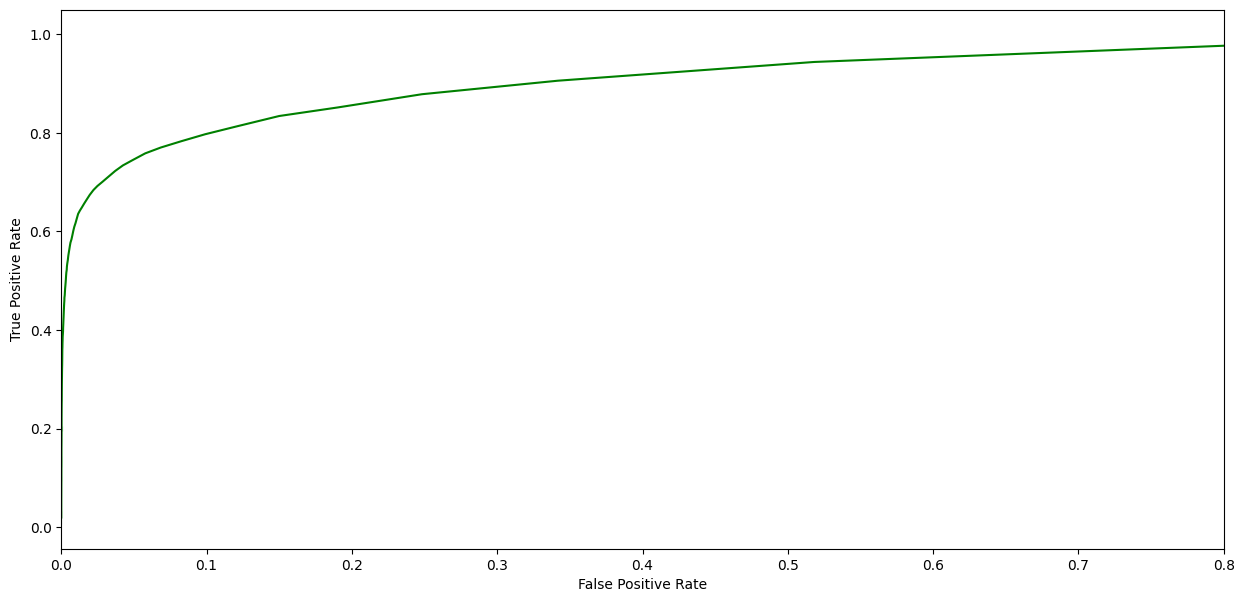

In [45]:
fpr_1, tpr_1, thresholds_1=roc_curve(y_valid, y_predproba[:, 1])
fig,ax=plt.subplots(1,1,figsize=(15,7))
g=sns.lineplot(x=fpr_1,y=tpr_1,ax=ax,color='green')
g.set_xlabel('False Positive Rate')
g.set_ylabel('True Positive Rate')
g.set(xlim=(0,0.8))

In [46]:
# https://neptune.ai/blog/balanced-accuracy
pd.set_option('display.max_rows', None)
table = {'threshold': [], 'BAcc': [], 'Acc': []}
for th in thresholds_1:
    y_pred = [1 if i > th else 0 for i in y_predproba[:, 1]]
    table['threshold'].append(th)
    table['BAcc'].append(balanced_accuracy_score(y_valid, y_pred))
    table['Acc'].append(accuracy_score(y_valid, y_pred))
res = pd.DataFrame(table)
res

,threshold,BAcc,Acc
0,2.00,0.500000,0.965692
1,1.00,0.500000,0.965692
2,0.99,0.506293,0.966124
3,0.98,0.514067,0.966658
4,0.97,0.519497,0.967030
5,0.96,0.526773,0.967521
6,0.95,0.533674,0.967978
7,0.94,0.540699,0.968444
8,0.93,0.546983,0.968859
9,0.92,0.552166,0.969215


### Decision Tree

In [60]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(OH_X_train, y_train)

DecisionTreeClassifier()

In [61]:
y_predproba = dtc.predict_proba(OH_X_valid)
print(f'Validation AUC={roc_auc_score(y_valid, y_predproba[:, 1])}')

Validation AUC=0.75083516585019


[(0.0, 0.8)]

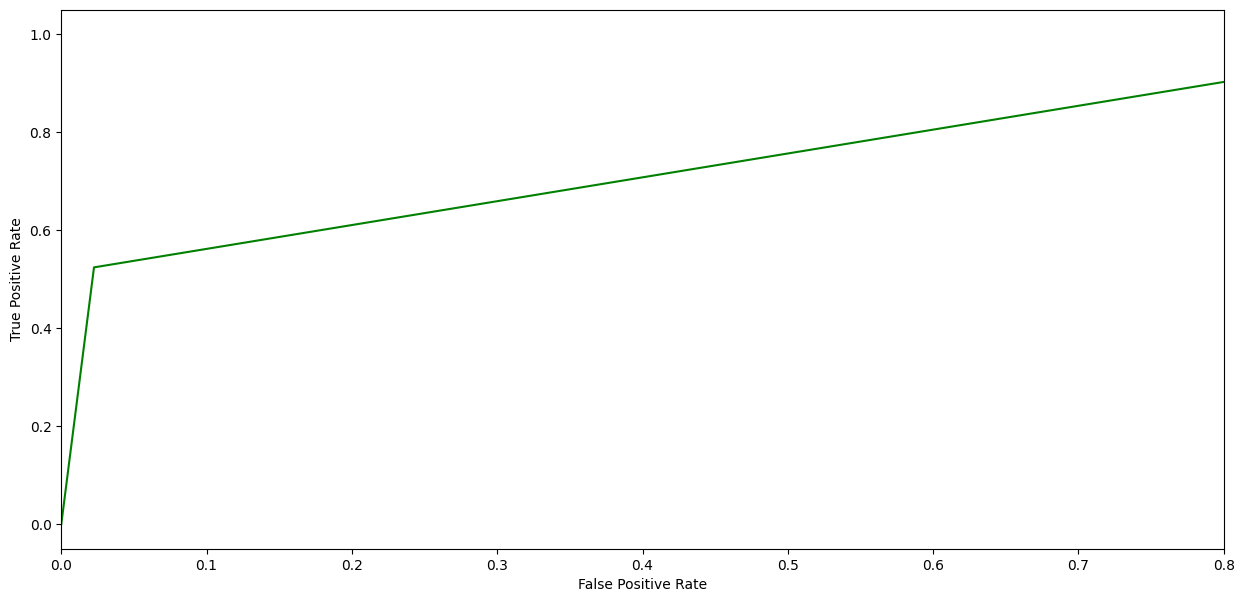

In [62]:
fpr_1, tpr_1, thresholds_1=roc_curve(y_valid, y_predproba[:, 1])
fig,ax=plt.subplots(1,1,figsize=(15,7))
g=sns.lineplot(x=fpr_1,y=tpr_1,ax=ax,color='green')
g.set_xlabel('False Positive Rate')
g.set_ylabel('True Positive Rate')
g.set(xlim=(0,0.8))

In [63]:
pd.set_option('display.max_rows', None)
table = {'threshold': [], 'BAcc': [], 'Acc': []}
for th in thresholds_1:
    y_pred = [1 if i > th else 0 for i in y_predproba[:, 1]]
    table['threshold'].append(th)
    table['BAcc'].append(balanced_accuracy_score(y_valid, y_pred))
    table['Acc'].append(accuracy_score(y_valid, y_pred))
res = pd.DataFrame(table)
res

,threshold,BAcc,Acc
0,2.0,0.500000,0.965692
1,1.0,0.500000,0.965692
2,0.0,0.750835,0.961933


### XGBoost

In [50]:
xgb_clf = XGBClassifier()
xgb_clf.fit(OH_X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [51]:
y_predproba = xgb_clf.predict_proba(OH_X_valid)
print(f'Validation AUC={roc_auc_score(y_valid, y_predproba[:, 1])}')

Validation AUC=0.9316249948242462


[(0.0, 0.8)]

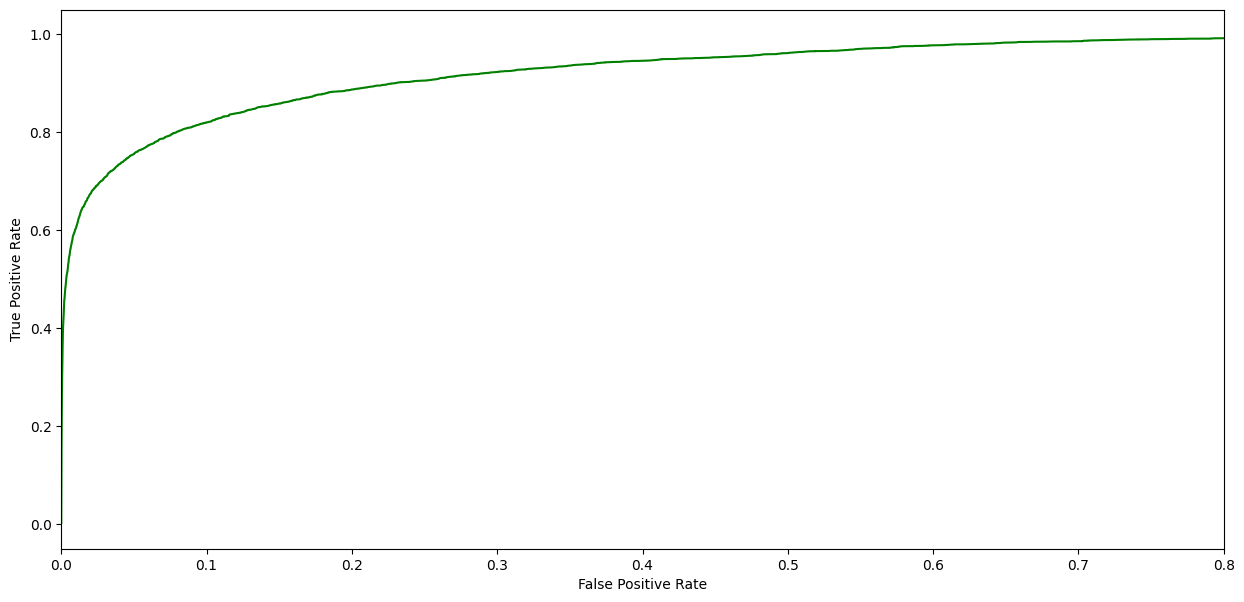

In [52]:
fpr_1, tpr_1, thresholds_1=roc_curve(y_valid, y_predproba[:, 1])
fig,ax=plt.subplots(1,1,figsize=(15,7))
g=sns.lineplot(x=fpr_1,y=tpr_1,ax=ax,color='green')
g.set_xlabel('False Positive Rate')
g.set_ylabel('True Positive Rate')
g.set(xlim=(0,0.8))

In [53]:
pd.set_option('display.max_rows', None)
table = {'threshold': [], 'BAcc': [], 'Acc': []}
for th in thresholds_1:
    y_pred = [1 if i > th else 0 for i in y_predproba[:, 1]]
    table['threshold'].append(th)
    table['BAcc'].append(balanced_accuracy_score(y_valid, y_pred))
    table['Acc'].append(accuracy_score(y_valid, y_pred))
res = pd.DataFrame(table)
res

,threshold,BAcc,Acc
0,1.999753,0.500000,0.965692
1,0.999753,0.500000,0.965692
2,0.998564,0.504072,0.965972
3,0.998561,0.504195,0.965980
4,0.995845,0.513322,0.966598
5,0.995826,0.513446,0.966607
6,0.993869,0.517020,0.966844
7,0.993762,0.517143,0.966852
8,0.993244,0.517632,0.966878
9,0.993147,0.517756,0.966886


### KNN

In [55]:
knn = KNeighborsClassifier()
knn.fit(OH_X_train, y_train)

KNeighborsClassifier()

In [56]:
y_predproba = knn.predict_proba(OH_X_valid)
print(f'Validation AUC={roc_auc_score(y_valid, y_predproba[:, 1])}')

Validation AUC=0.8424275451604418


[(0.0, 0.8)]

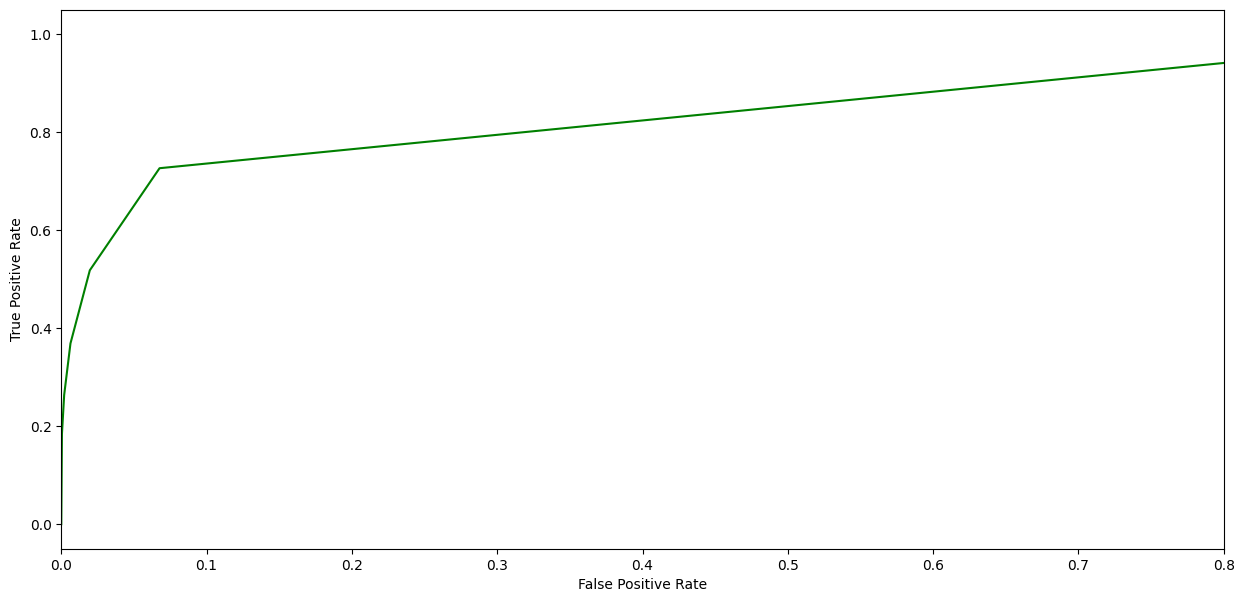

In [57]:
fpr_1, tpr_1, thresholds_1=roc_curve(y_valid, y_predproba[:, 1])
fig,ax=plt.subplots(1,1,figsize=(15,7))
g=sns.lineplot(x=fpr_1,y=tpr_1,ax=ax,color='green')
g.set_xlabel('False Positive Rate')
g.set_ylabel('True Positive Rate')
g.set(xlim=(0,0.8))

In [58]:
pd.set_option('display.max_rows', None)
table = {'threshold': [], 'BAcc': [], 'Acc': []}
for th in thresholds_1:
    y_pred = [1 if i > th else 0 for i in y_predproba[:, 1]]
    table['threshold'].append(th)
    table['BAcc'].append(balanced_accuracy_score(y_valid, y_pred))
    table['Acc'].append(accuracy_score(y_valid, y_pred))
res = pd.DataFrame(table)
res

,threshold,BAcc,Acc
0,2.0,0.500000,0.965692
1,1.0,0.500000,0.965692
2,0.8,0.591949,0.971577
3,0.6,0.630915,0.972821
4,0.4,0.681316,0.972246
5,0.2,0.749307,0.964499
6,0.0,0.829465,0.925314


### Logisitic Regression + L2 penalty

In [60]:
lrfit = LogisticRegression()
lrfit.fit(OH_X_train, y_train)

LogisticRegression()

In [61]:
y_predproba = lrfit.predict_proba(OH_X_valid)
print(f'Validation AUC={roc_auc_score(y_valid, y_predproba[:, 1])}')

Validation AUC=0.7356975208347456


[(0.0, 0.8)]

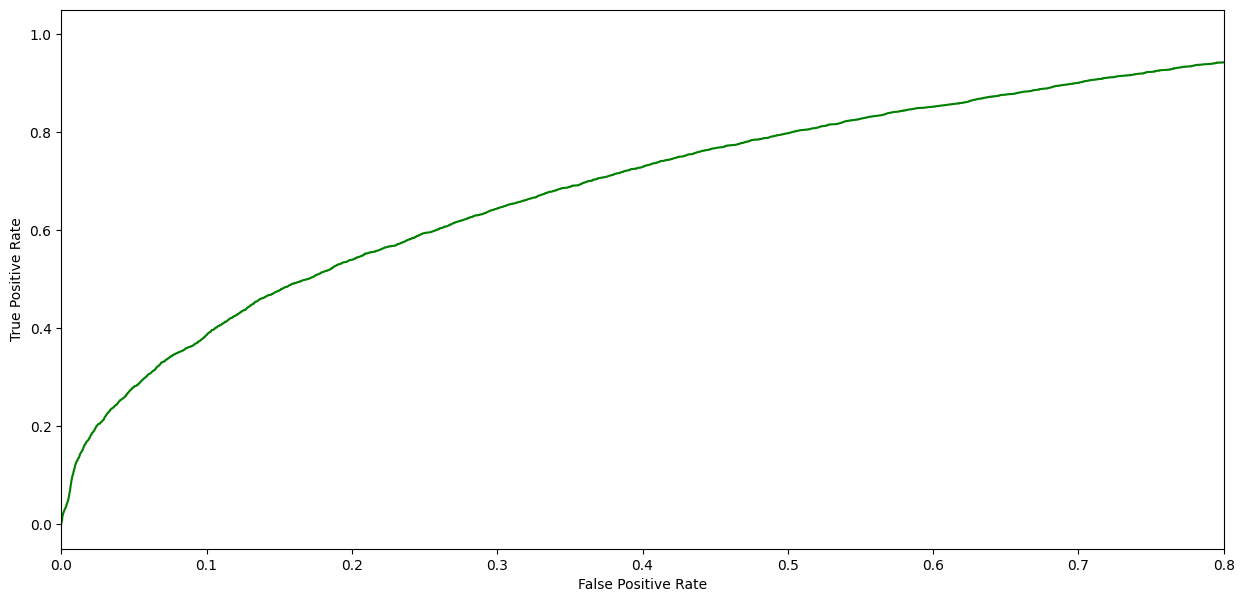

In [62]:
fpr_1, tpr_1, thresholds_1=roc_curve(y_valid, y_predproba[:, 1])
fig,ax=plt.subplots(1,1,figsize=(15,7))
g=sns.lineplot(x=fpr_1,y=tpr_1,ax=ax,color='green')
g.set_xlabel('False Positive Rate')
g.set_ylabel('True Positive Rate')
g.set(xlim=(0,0.8))

In [63]:
pd.set_option('display.max_rows', None)
table = {'threshold': [], 'BAcc': [], 'Acc': []}
for th in thresholds_1:
    y_pred = [1 if i > th else 0 for i in y_predproba[:, 1]]
    table['threshold'].append(th)
    table['BAcc'].append(balanced_accuracy_score(y_valid, y_pred))
    table['Acc'].append(accuracy_score(y_valid, y_pred))
res = pd.DataFrame(table)
res

,threshold,BAcc,Acc
0,1.977643,0.500000,0.965692
1,0.977643,0.500000,0.965692
2,0.957486,0.500123,0.965701
3,0.948349,0.500247,0.965709
4,0.841411,0.501230,0.965769
5,0.839996,0.501353,0.965777
6,0.833321,0.501349,0.965769
7,0.792735,0.501454,0.965743
8,0.786004,0.501450,0.965735
9,0.738101,0.501547,0.965692


### Logistic Regression + L1 penalty

In [68]:
lrfit = LogisticRegression(penalty = 'l1', solver = 'liblinear')
lrfit.fit(OH_X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [69]:
y_predproba = lrfit.predict_proba(OH_X_valid)
print(f'Validation AUC={roc_auc_score(y_valid, y_predproba[:, 1])}')

Validation AUC=0.8235687063302272


[(0.0, 0.8)]

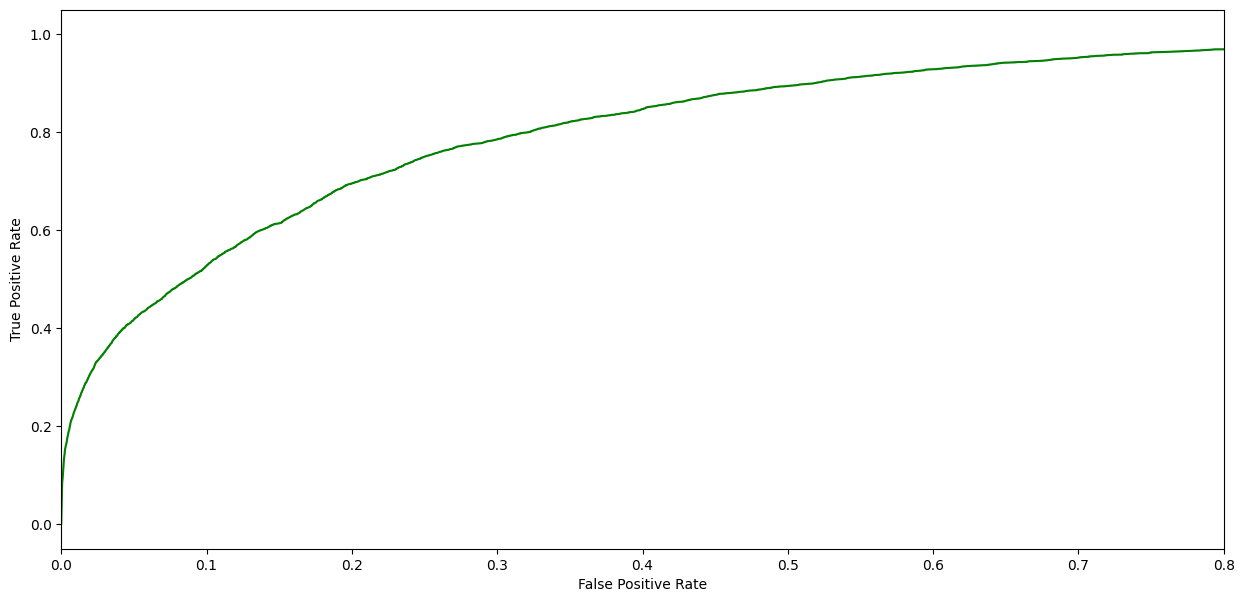

In [70]:
fpr_1, tpr_1, thresholds_1=roc_curve(y_valid, y_predproba[:, 1])
fig,ax=plt.subplots(1,1,figsize=(15,7))
g=sns.lineplot(x=fpr_1,y=tpr_1,ax=ax,color='green')
g.set_xlabel('False Positive Rate')
g.set_ylabel('True Positive Rate')
g.set(xlim=(0,0.8))

In [76]:
thresholds = [thresholds_1[i] for i in range(1, len(thresholds_1), 10)]
len(thresholds)

67

In [77]:
pd.set_option('display.max_rows', None)
table = {'threshold': [], 'BAcc': [], 'Acc': []}
for th in thresholds:
    y_pred = [1 if i > th else 0 for i in y_predproba[:, 1]]
    table['threshold'].append(th)
    table['BAcc'].append(balanced_accuracy_score(y_valid, y_pred))
    table['Acc'].append(accuracy_score(y_valid, y_pred))
res = pd.DataFrame(table)
res

,threshold,BAcc,Acc
0,0.992306,0.506271,0.966082
1,0.657578,0.540555,0.967936
2,0.524795,0.552799,0.968139
3,0.435041,0.566890,0.968461
4,0.359192,0.577135,0.968249
5,0.306873,0.586124,0.967682
6,0.268910,0.594324,0.966971
7,0.235621,0.603861,0.966082
8,0.215097,0.610040,0.964913
9,0.201510,0.616439,0.963711
